In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.utils.extmath import softmax
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from mpl_toolkits.axes_grid1 import make_axes_locatable

import sys
sys.path.append('../src')  # Go one level up and then into src
from SMF import SMF_BCD

/Users/yee/Code/SMF_BCD/SMF/notebooks/../src/SMF.py:132: SyntaxWarning: invalid escape sequence '\h'
  '''
/Users/yee/Code/SMF_BCD/SMF/notebooks/../src/SMF.py:180: SyntaxWarning: invalid escape sequence '\h'
  '''
/Users/yee/Code/SMF_BCD/SMF/notebooks/../src/SMF.py:249: SyntaxWarning: invalid escape sequence '\h'
  '''
/Users/yee/Code/SMF_BCD/SMF/notebooks/../src/SMF.py:1305: SyntaxWarning: invalid escape sequence '\h'
  '''
/Users/yee/Code/SMF_BCD/SMF/notebooks/../src/SMF.py:1626: SyntaxWarning: invalid escape sequence '\h'
  '''


In [2]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
# X = X.values  ### Uncomment this line if you are having type errors in plotting. It is loading as a pandas dataframe, but our indexing is for numpy array. 
X = X / 255.

print('X.shape', X.shape)
print('y.shape', y.shape)

'''
Each row of X is a vectroization of an image of 28 x 28 = 784 pixels.  
The corresponding row of y holds the true class label from {0,1, .. , 9}.
'''

X.shape (70000, 784)
y.shape (70000,)


'\nEach row of X is a vectroization of an image of 28 x 28 = 784 pixels.  \nThe corresponding row of y holds the true class label from {0,1, .. , 9}.\n'

In [3]:
### Change the dimension of y for SMF_BCD
y_matrix = np.zeros((9, y.shape[0]))
for i in range(y.shape[0]):
    label = int(y[i])
    if label == 0:
        continue
    else:
        y_matrix[label-1, i] = 1

print(y_matrix.shape)
    

(9, 70000)


In [4]:
### Scale the input data
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X)

X= scaler.transform(X)

print(X.shape)

(70000, 784)


In [5]:
n_components = 16

SMF_Train = SMF_BCD([X.T, y_matrix], X_test=[X.T, y_matrix], xi= 5, n_components=n_components)

results_dict = SMF_Train.fit(iter=100, subsample_size=None,# search_radius_const=200*np.linalg.norm(X),
                                if_compute_recons_error=False, if_validate=False, threshold=0.5)

initial loading beta [[ 7.69281020e-01  2.87099295e-01  6.20553354e-01 -1.07934527e-01
  -5.43797855e-01  4.93926577e-01  2.95875172e-01 -8.01873032e-01
  -4.01907013e-01  9.97707846e-01  4.10868929e-01 -4.15258692e-02
  -1.21906538e-02 -2.77107634e-01  7.08588143e-02  7.78997708e-01
  -8.62145984e-01]
 [-4.49181440e-01  7.65717585e-01 -5.94623407e-01 -6.68741674e-01
  -4.10615243e-01  9.26251589e-01 -3.75352479e-02 -2.55466057e-01
  -5.47193488e-01  5.54091234e-01  1.63171439e-01 -5.79157609e-02
  -1.85260263e-01  7.01507848e-01  6.28967958e-01  3.76899529e-01
  -7.03839889e-01]
 [ 2.19554501e-01  9.74131684e-01  6.38972152e-01  6.25380721e-01
   7.87924281e-01 -7.34975972e-01  2.49709170e-01  9.77992088e-01
  -4.89053596e-01 -1.84463544e-01 -4.93058862e-01  1.58852538e-01
   8.62721003e-01 -8.34760864e-01 -5.22417405e-01  8.28731254e-01
  -3.45026827e-01]
 [-4.65836013e-01  7.78673986e-04 -3.81509256e-02 -6.97973165e-01
  -6.58747800e-02  5.00304402e-01 -7.65853104e-01  4.91006581e-0

100%|██████████| 100/100 [06:44<00:00,  4.05s/it]
/Users/yee/miniforge3/envs/REU2024/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yee/Code/SMF_BCD/SMF/notebooks/../src/SMF.py:132: SyntaxWarning: invalid escape sequence '\h'
  '''
/Users/yee/Code/SMF_BCD/SMF/notebooks/../src/SMF.py:180: SyntaxWarning: invalid escape sequence '\h'
  '''
/Users/yee/Code/SMF_BCD/SMF/notebooks/../src/SMF.py:249: SyntaxWarning: invalid escape sequence '\h'
  '''
/Users/yee/Code/SMF_BCD/SMF/notebooks/../src/SMF.py:1305: SyntaxWarning: invalid escape sequen

NameError: name 'threshhold' is not defined

In [ ]:
W = results_dict.get('loading')[0]
beta= results_dict.get('loading')[1]
H = results_dict.get('code')

In [ ]:
n = np.random.randint(0, 70000, size=100)
X_test = np.ones((X.shape[1], 100))
y_test = np.ones(shape=100)
for i in range(100):
    X_test[:, i] = X.T[:, n[i]]
    y_test[i] = y[n[i]]

p = np.zeros((100, 9))
for i in range(100):
    normalizer = 1 + np.sum(np.exp(beta[:, 1:] @ W.T @ X_test[:, i] + beta[:, 0]))
    p[i] = (np.exp(beta[:, 1:] @ W.T @ X_test[:, i] + beta[:, 0]) / normalizer).T


acc = 0
for j in range(100):
    prob = np.max(p[j])
    number = np.argmax(p[j]) + 1
    if (1 - np.sum(p[j])) > prob:
        number = 0
    if y_test[j] == number:
        acc += 1

print(f"The accuracy rate: {acc/100}")


The accuracy rate: 0.89


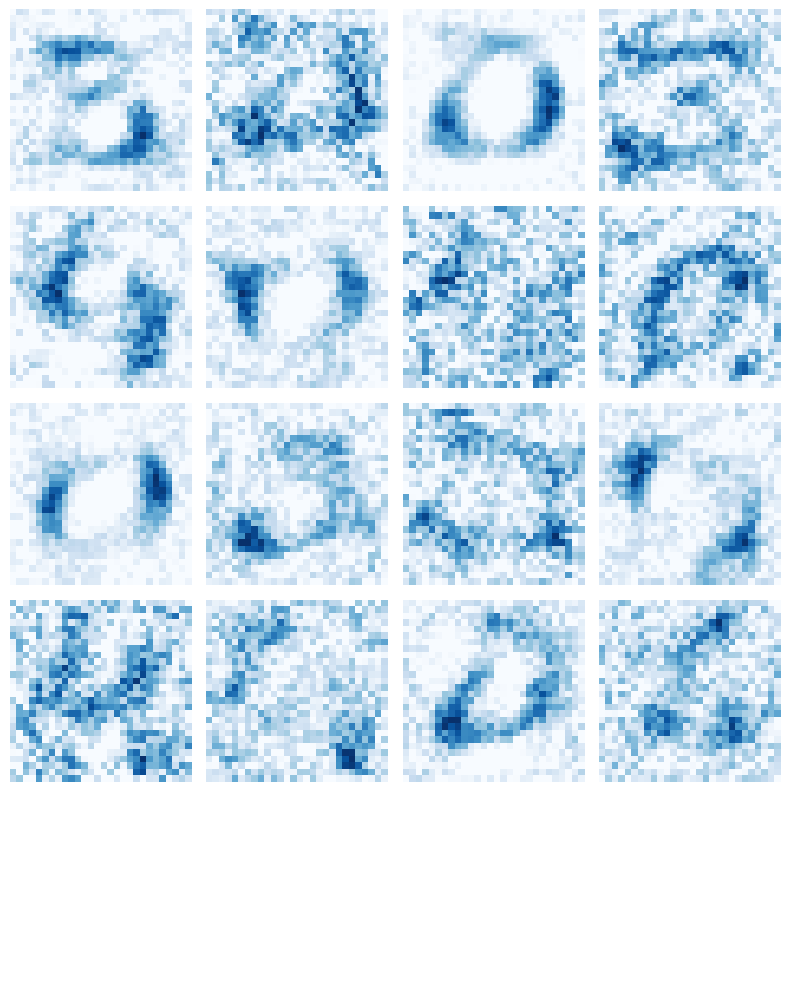

In [ ]:
image = np.zeros((n_components, 28, 28))
for i in range(n_components):
    image[i] = W[:, i].reshape(28,28)

images_per_row = 4
n_rows = len(image) // images_per_row + 1

# Create a figure with subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=images_per_row, figsize=(images_per_row * 2, n_rows * 2))

for i, ax in enumerate(axes.flat):
    if i < n_components:
        # Reshape and display each component as an image
        ax.imshow(image[i], cmap='Blues')  # Use gray scale color map
        ax.axis('off')  # Hide axes
    else:
        ax.axis('off')  # Hide axes for empty subplots

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig("MINIST")

# Display the plot if needed
plt.show()

In [ ]:
print(beta.T[0])

[-8.37451205  1.07817752  0.73084603 -1.03527696  1.60882836 -0.85834435
 -1.53816862  2.47508355 -0.57196613]
